# 通常のP値とBayes的な類似物がほぼ一致する場合

* 黒木玄
* 2022-08-01
$
\newcommand\op{\operatorname}
$

ツイッターでの

* https://twitter.com/iznaiy_emjawak/status/1553717951273922560
* https://twitter.com/iznaiy_emjawak/status/1553741283025227781
* https://twitter.com/epidemia_jp/status/1553693080846417921
* https://twitter.com/epidemia_jp/status/1552902192670986240
* https://twitter.com/epidemia_jp/status/1552933838245941248

を見て存在を知った論文

* https://evidence.nejm.org/doi/full/10.1056/EVIDctw2200018
* https://arxiv.org/abs/2203.11164

の Julia による再現. 通常のP値とそのBayes的類似物がほぼ一致する場合について, 片側検定のP値のBayes的類似物をプロットしているだけであった.

## Juliaによる再現が論文と違う所

* 通常の信頼区間の計算をWald法で直接行った. `glm` の類を使うまでもない.

* 事前分布としてJeffreys事前分布(共役事前分布でおとなしめのものなら何でもよい)を採用した.  論文では logit 座標での正規分布を採用していたが, そういう難しいことをせずに, 共役事前分布を使えばシンプルにかつ効率的に計算できる.  そして, 二項分布モデルに関しては, 通常のP値と信頼区間と比較する場合には, Jeffreys事前分布を採用すると一致し易くなる.

* このように変更しても結果はほとんど変わらない.

## リスク差のP値と信頼区間を計算する函数の作り方

2つの二項分布モデル

$$
(a,c)\sim\op{Binomial}(m,p)\times\op{Binomial}(n,q), \quad
(b,d)=(m-a, n-c)
$$

を考える. このとき, $a,c$ は独立に二項分布に従い, 

$$
\hat{p} = \frac{a}{a+b}, \quad \hat{q} = \frac{c}{c+d}
$$

の平均と分散は以下のようになる:

$$
E[\hat{p}] = p, \quad
E[\hat{q}] = q, \quad
\op{var}(\hat{p}) +  = \frac{p(1-p)}{m}, \quad
\op{var}(\hat{q}) = \frac{q(1-q)}{n}.
$$

ゆえに, 比率の差

$$
\Delta = p - q
$$

の推定量

$$
\hat{\Delta} = \hat{p} - \hat{q} 
$$

の平均と分散は次のようになる:

$$
E[\hat{\Delta}] = \Delta = p - q, \quad
\op{var}(\hat{\Delta}) = \op{var}(\hat{p}) + \op{var}(\hat{q}) = \frac{p(1-p)}{m} + \frac{q(1-q)}{n}.
$$

Wald法を使用するために, $\op{var}(\hat{\Delta})$ の推定量として, 上の式の $p$, $q$ に $\hat{p}$, $\hat{q}$ を代入したものを使用する.  $\widehat{\op{SE}}_{\hat{\Delta}}$ を次のように定める:

$$
\widehat{\op{SE}}_{\hat{\Delta}} = \sqrt{\frac{p(1-p)}{m} + \frac{q(1-q)}{n}}.
$$

このとき, Wald法を使った次の公式によって, 仮説 $\Delta=\Delta_0$ のP値 $\op{pvalue}_{\op{Wald}}(\,a,b,c,d\mid \Delta=\Delta_0\,)$ を次のように定めることができる:

$$
\op{pvalue}_{\op{Wald}}(\,a,b,c,d\mid \Delta=\Delta_0\,) =
2\left(1-\op{cdf}\left(\op{Normal}(0,1),\; \frac{|\hat{\Delta} - \Delta_0|}{\widehat{\op{SE}}_{\hat{\Delta}}}\right)\right).
$$

ここで $\op{cdf}(D, x)$ は分布 $D$ の累積分布函数を表し, $\op{Normal}(\mu,\sigma)$ は平均 $\mu$ と標準偏差 $\sigma$ を持つ正規分布を表す.

分布 $D$ の分位点函数を $\op{quantile}(D, p)$ と書き,

$$
z_{\alpha/2} = \op{quantile}(\op{Normal}(0,1), 1-\alpha/2)
$$

とおく.  上のP値函数に対応する信頼度 $1-\alpha$ の信頼区間が

$$
\op{confint}^{\Delta}_{\op{Wald}}(\,a,b,c,d\mid \alpha) =
\{\, \Delta_0\in[-1,1] \mid \op{pvalue}_{\op{Wald}}(\,a,b,c,d\mid \Delta=\Delta_0\,) \ge \alpha\,\}.
$$

と定義され, これは次のように表される:

$$
\op{confint}^{\Delta}_{\op{Wald}}(\,a,b,c,d\mid \alpha) = \left[
\hat{\Delta} - z_{\alpha/2}\widehat{\op{SE}}_{\hat{\Delta}},\;
\hat{\Delta} + z_{\alpha/2}\widehat{\op{SE}}_{\hat{\Delta}}
\right].
$$

これを比率の差 $\Delta$ に関するWaldの信頼区間と呼ぶことにする.

ただし, 比率の差に関するこのWaldの信頼区間は誤差が大きいことがよく知られている.

* Kenneth J. Rothman, Sander Greenland, and Timothy L. Lash, Modern Epistemology, Third Edition, 2008, 888 pages

の Chapter 14. Instroduction to Categorical Statistics の Section. Two Study Groups: Large-Sample Methods, pp.299-300 では, 次の論文の方法をすすめている:

* Guangyong Zou and Allan Donner, A simple alternative confidence interval for the difference between two proportions, Controlled Clinical Trials, Volume 25, Issue 1, February 2004, Pages 3-12. https://doi.org/10.1016/j.cct.2003.08.010

この論文の方法は $\hat{\Delta}$, $\Delta$ をそれらのFisherの $z$ 変換 $\op{arc\,tanh(\hat(\Delta)})$, $\op{arc\,tanh(\Delta})$ で置き換えてWald法でP値を構成することである.

## 片側検定のP値

上のWald検定の文脈で仮説 $\Delta \ge \Delta_0$ の片側検定のP値は次のように定義される:

$$
\op{pvalue}_{\op{Wald}}(\,a,b,c,d\mid \Delta\ge\Delta_0\,) =
\op{cdf}\left(\op{Normal}(0,1),\; \frac{\hat{\Delta} - \Delta_0}{\widehat{\op{SE}}_{\hat{\Delta}}}\right)
$$

これは $\Delta_0$ の函数として単調減少する.

## Bayes的類似物

以上のP値と信頼区間のBayes的類似は以下のように構成される. 

二項分布の事前分布として共役事前分布 $\op{Beta}(\gamma,\delta)$ を使うことにしよう.

そのとき, データ $a,b,c,d$ から得られる $(p,q)$ の事後分布は

$$
\op{posterior} = \op{Beta}(\gamma+a, \delta+b)\times\op{Beta}(\gamma+c, \delta+d)
$$

になる. この事後分布に関する仮説 $\Delta=\Delta_0$ の両側検定のP値の類似物は次のように定義される:

$$
\op{pvalue}_{\op{Bayesian}}(\,a,b,c,d\mid \Delta=\Delta_0\,) =
\min\begin{pmatrix}
1 \\
2P\left(\Delta \le \Delta_0 \mid \op{posterior}\,\right) \\
2\left(1 - P\left(\Delta \ge \Delta_0 \mid \op{posterior}\,\right)\right) \\
\end{pmatrix}
$$

ここで $\Delta = p - q$ は事後分布 $\op{posterior}$ の下での確率変数とみなされており, $P(\ )$ は確率を表す.

事後分布 $\op{posterior}$ から定まる $\Delta$ の分布を $\op{posterior}_\Delta$ を書くと,

$$
\op{pvalue}_{\op{Bayesian}}(\,a,b,c,d\mid \Delta=\Delta_0\,) =
\min\begin{pmatrix}
1 \\
2\op{cdf}\left(\op{posterior}_\Delta, \Delta_0\right) \\
2\left(1 - \op{cdf}\left(\op{posterior}_\Delta, \Delta_0\right)\right) \\
\end{pmatrix}
$$

このP値函数(の類似物)に対応する信頼区間

$$
\op{credint}^{\Delta}_{\op{Bayesian}}(\,a,b,c,d\mid \alpha\,) = \left[
\op{quantile}(\op{posterior}_\Delta, \alpha/2),\;
\op{quantile}(\op{posterior}_\Delta, 1-\alpha/2)
\right]
$$

は信用区間(確信区間, credible interval)と呼ばれている.

これらは, 事後分布に従う乱数を大量に生成することによって(Monte Carlo法によって), 容易に近似計算可能である.

$a,b,c,d$ が十分に大きければ, 以上で定義したP値函数と信頼区間のBayes的類似物は通常のP値と信頼区間をよく近似する.

__注意・警告:__ シンプルな統計モデルに関しては, P値と信頼区間のBayes的類似物を容易に定義できて, それらは通常のP値と信頼区間に近似的に一致することが多い.  少なくともそのような場合について, 「頻度論 vs. ベイズ主義」的な解釈の違いについて語ることは無意味である.  ところが, ベイズ的な計算と通常のP値を使った計算が近似的によく一致している場合であることを正直に語らずに(もしかしたら単に知らないのかもしれない), 「頻度論 vs. ベイズ主義」のような分断を煽る議論を行うことが大流行しているので注意して欲しい.

In [1]:
using Distributions
using Random
using Roots
using StatsBase
using StatsFuns
using StatsPlots
default(fmt=:png, titlefontsize=10, plot_titlefontsize=12)

In [2]:
# リスク差のP値と信頼区間を計算する函数達

safemul(x, y) = x == 0 ? x : isinf(x) ? typeof(x)(Inf) : x*y
safediv(x, y) = x == 0 ? x : isinf(y) ? zero(y) : x/y

riskdiffhat(a, b, c, d) = safediv(a, a+b) - safediv(c, c+d)

function stderr_riskdiffhat(a, b, c, d; correction = 0)
    m, n = a+b, c+d
    p̂, q̂ = safediv(a, m), safediv(c, n)
    √(safediv(p̂*(1-p̂), m - correction) + safediv(q̂*(1-q̂), n - correction))
end

function pvalue_rd_wald(a, b, c, d; Δ=0)
    RDhat = riskdiffhat(a, b, c, d)
    SEhat_riskdiffhat = stderr_riskdiffhat(a, b, c, d)
    2ccdf(Normal(0, 1), safediv(abs(RDhat - Δ), SEhat_riskdiffhat))
end

function confint_rd_wald(a, b, c, d; α=0.05)
    z = quantile(Normal(), 1-α/2)
    RDhat = riskdiffhat(a, b, c, d)
    SEhat_riskdiffhat = stderr_riskdiffhat(a, b, c, d)
    [RDhat - z*SEhat_riskdiffhat, RDhat + z*SEhat_riskdiffhat]
end

# 以下の方法は
#
# Kenneth J. Rothman, Sander Greenland, and Timothy L. Lash
# Modern Epistemology, Third Edition, 2008, 888 pages
#
# の
#
# Chapter 14. Instroduction to Categorical Statistics
# Section. Two Study Groups: Large-Sample Methods, pp.299-300
#
# に書いてある. そこでは, 次の文献が引用されている:
#
# Guangyong Zou and Allan Donner
# A simple alternative confidence interval for the difference between two proportions
# Controlled Clinical Trials, Volume 25, Issue 1, February 2004, Pages 3-12
# https://doi.org/10.1016/j.cct.2003.08.010

function pvalue_rd_zou_donner(a, b, c, d; Δ=0)
    ((a==0 && d==0) || (b==0 && c==0)) && return 1.0
    RDhat = riskdiffhat(a, b, c, d)
    SEhat_riskdiffhat = stderr_riskdiffhat(a, b, c, d; correction = 1)
    Z = safediv((1 - RDhat^2)*abs(atanh(RDhat) - atanh(Δ)), SEhat_riskdiffhat)
    2ccdf(Normal(), abs(Z))
end

function confint_rd_zou_donner(a, b, c, d; α=0.05)
    z = quantile(Normal(), 1-α/2)
    RDhat = riskdiffhat(a, b, c, d)
    SEhat_riskdiffhat = stderr_riskdiffhat(a, b, c, d; correction = 1)
    m = atanh(RDhat)
    d = safediv(z*SEhat_riskdiffhat, 1 - RDhat^2)
    [tanh(m-d), tanh(m+d)]
end

confint_rd_zou_donner (generic function with 1 method)

In [3]:
# ジェネリックな信頼区間函数
function confint_rd(pvaluefunc; α=0.05)
    f(x) = pvaluefunc(x) - α
    find_zeros(f, -1, 1)
end

# 信頼区間函数達が正しいかどうかの確認

a, b, c, d = 426-255, 255, 433-277, 277

ci1 = @show confint_rd_wald(a, b, c, d; α=0.05)
f_wald(Δ) = pvalue_rd_wald(a, b, c, d; Δ)
ci2 = @show confint_rd(f_wald; α=0.05)
@show ci1 - ci2

ci1 = @show confint_rd_zou_donner(a, b, c, d; α=0.05)
f_zou_donner(Δ) = pvalue_rd_zou_donner(a, b, c, d; Δ)
ci2 = @show confint_rd(f_zou_donner; α=0.05)
@show ci1 - ci2
;

confint_rd_wald(a, b, c, d; α = 0.05) = [-0.023764437377364972, 0.10602706626849465]
confint_rd(f_wald; α = 0.05) = [-0.023764437377364864, 0.10602706626849454]
ci1 - ci2 = [-1.0755285551056204e-16, 1.1102230246251565e-16]
confint_rd_zou_donner(a, b, c, d; α = 0.05) = [-0.023922460793897343, 0.10583822418701612]
confint_rd(f_zou_donner; α = 0.05) = [-0.023922460793897236, 0.10583822418701601]
ci1 - ci2 = [-1.0755285551056204e-16, 1.1102230246251565e-16]


In [4]:
# 片側検定のP値函数

function pvalue_rd_ge_wald(a, b, c, d; Δ=0)
    RDhat = riskdiffhat(a, b, c, d)
    SEhat_riskdiffhat = stderr_riskdiffhat(a, b, c, d)
    cdf(Normal(0, 1), safediv(RDhat - Δ, SEhat_riskdiffhat))
end

pvalue_rd_ge_wald (generic function with 1 method)

In [5]:
# Bayes統計版

function make_ecdf_posterior_rd(a, b, c, d; conjprior=(0.5, 0.5), L=10^6)
    posterior1 = Beta((conjprior .+ (a, b))...)
    posterior2 = Beta((conjprior .+ (c, d))...)
    P = rand(posterior1, L)
    Q = rand(posterior2, L)
    diff = P - Q
    _ecdf_delta = ecdf(diff)
    ecdf_rd_bayes(x) = _ecdf_delta(x)
    eccdf_rd_bayes(x) = 1 - _ecdf_delta(x)
    pvalue_rd_bayes(x) = min(1, 2ecdf_rd_bayes(x), 2eccdf_rd_bayes(x))
    confint_rd_bayes(; α=0.05) = collect(quantile.(Ref(diff), (α/2, 1-α/2)))
    (; ecdf_rd_bayes, eccdf_rd_bayes, pvalue_rd_bayes, confint_rd_bayes)
end

make_ecdf_posterior_rd (generic function with 1 method)

In [6]:
# 信頼区間函数達が正しいかどうかの確認

a, b, c, d = 426-255, 255, 433-277, 277

(; ecdf_rd_bayes, eccdf_rd_bayes, pvalue_rd_bayes, confint_rd_bayes) =
        make_ecdf_posterior_rd(a, b, c, d; conjprior=(0.5, 0.5))

ci1 = @show confint_rd_bayes(; α=0.05)
ci2 = @show confint_rd(pvalue_rd_bayes; α=0.05)
@show ci1 - ci2
;

confint_rd_bayes(; α = 0.05) = [-0.02364523615125932, 0.10567365071644655]
confint_rd(pvalue_rd_bayes; α = 0.05) = [-0.023645303466096477, 0.10567451846141783]
ci1 - ci2 = [6.731483715577413e-8, -8.677449712807261e-7]


In [7]:
# グラフのプロット用の函数

function plot_ACCEPT(; data = earnest, unacceptable_diff = 0.0, legend = :left)
    @show data
    @show unacceptable_diff

    (; ecdf_rd_bayes, eccdf_rd_bayes, pvalue_rd_bayes, confint_rd_bayes) =
        make_ecdf_posterior_rd(data...; conjprior=(0.5, 0.5))
    RDhat = @show riskdiffhat(data...)
    @show ecdf_rd_bayes._ecdf_delta.sorted_values |> mean
    @show ecdf_rd_bayes._ecdf_delta.sorted_values |> median
    ci_wald = @show confint_rd_wald(data...; α=0.05)
    ci_bayes = @show confint_rd_bayes(; α=0.05)

    P0 = plot(; legend)
    plot!(Δ -> pvalue_rd_wald(data...; Δ), -0.15, 0.15; label="Wald", c=1)
    plot!(pvalue_rd_bayes, -0.15, 0.15; label="Bayesian", ls=:dash, c=2)
    vline!(ci_wald; label="95% CI (Wald)", c=3)
    vline!(ci_bayes; label="95% CI (Bayesian)", ls=:dash, c=4)
    vline!([unacceptable_diff]; label="unacceptable diff.", ls=:dashdot, c=5)
    scatter!([RDhat], [pvalue_rd_wald(data...; Δ=RDhat)];
        marker=:o, label="", c=:red, msc=:auto)
    scatter!([first(ci_wald)], [pvalue_rd_wald(data...; Δ=first(ci_wald))];
        marker=:square, label="", c=:red, msc=:auto)
    scatter!([last(ci_wald)], [pvalue_rd_wald(data...; Δ=last(ci_wald))];
        marker=:utriangle, label="", c=:red, msc=:auto)
    scatter!([unacceptable_diff], [pvalue_rd_wald(data...; Δ=unacceptable_diff)];
        marker=:x, label="", c=:red, msw=3)
    plot!(ytick=0:0.05:1)
    title!("two-sided P-value functions")

    P1 = plot(; legend)
    plot!(Δ -> pvalue_rd_ge_wald(data...; Δ), -0.15, 0.15; label="Wald", c=1)
    plot!(eccdf_rd_bayes, -0.15, 0.15; label="Bayesian", ls=:dash, c=2)
    vline!(ci_wald; label="95% CI (Wald)", c=3)
    vline!(ci_bayes; label="95% CI (Bayesian)", ls=:dash, c=4)
    vline!([unacceptable_diff]; label="unacceptable diff.", ls=:dashdot, c=5)
    scatter!([RDhat], [pvalue_rd_ge_wald(data...; Δ=RDhat)];
        marker=:o, label="", c=:red, msc=:auto)
    scatter!([first(ci_wald)], [pvalue_rd_ge_wald(data...; Δ=first(ci_wald))];
        marker=:square, label="", c=:red, msc=:auto)
    scatter!([last(ci_wald)], [pvalue_rd_ge_wald(data...; Δ=last(ci_wald))];
        marker=:utriangle, label="", c=:red, msc=:auto)
    scatter!([unacceptable_diff], [pvalue_rd_ge_wald(data...; Δ=unacceptable_diff)];
        marker=:x, label="", c=:red, msw=3)
    plot!(ytick=0:0.05:1)
    title!("one-sided P-value functions")

    plot(P1, P0; size=(1000, 320))
    plot!(plot_title="data = $data")
end

plot_ACCEPT (generic function with 1 method)

In [8]:
# 論文にあったデータの数値
earnest = (426-255, 255, 433-277, 277)

(171, 255, 156, 277)

In [9]:
# 論文にあったデータの数値
secondline = (271-219, 219, 270-223, 223)

(52, 219, 47, 223)

data = (171, 255, 156, 277)
unacceptable_diff = 0.0
riskdiffhat(data...) = 0.04113131444556484
ecdf_rd_bayes._ecdf_delta.sorted_values |> mean = 0.040998879048941915
ecdf_rd_bayes._ecdf_delta.sorted_values |> median = 0.04098309611283191
confint_rd_wald(data...; α = 0.05) = [-0.023764437377364972, 0.10602706626849465]
confint_rd_bayes(; α = 0.05) = [-0.023741665667338516, 0.10559317601966496]


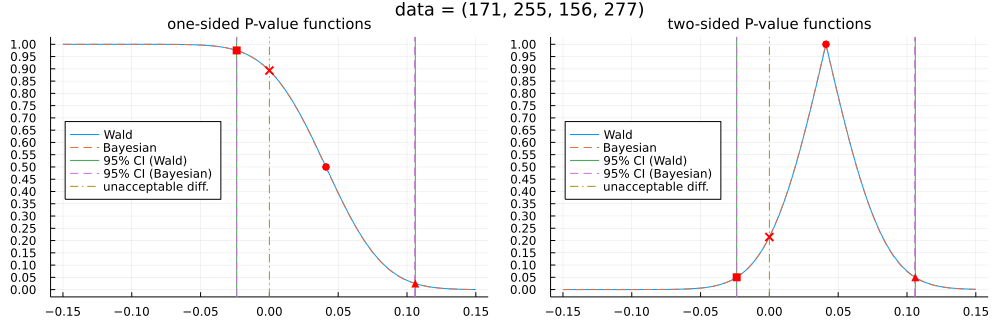

In [10]:
plot_ACCEPT(; data = earnest, unacceptable_diff = 0.0)

通常のP値版とそのBayes的類似物版がグラフ上ではほぼぴったり一致している.

これの片側検定版の図(上の左半分)は[論文](https://arxiv.org/ftp/arxiv/papers/2203/2203.11164.pdf)にあった次の図の再現になっている.

<img src="https://github.com/genkuroki/public/raw/main/0034/2022-08-01a.png" width="70%">

data = (52, 219, 47, 223)
unacceptable_diff = -0.12
riskdiffhat(data...) = 0.017807844745114126
ecdf_rd_bayes._ecdf_delta.sorted_values |> mean = 0.017735352421085884
ecdf_rd_bayes._ecdf_delta.sorted_values |> median = 0.01773008323631403
confint_rd_wald(data...; α = 0.05) = [-0.047334915171884984, 0.08295060466211324]
confint_rd_bayes(; α = 0.05) = [-0.04745285268960824, 0.08296480342334764]


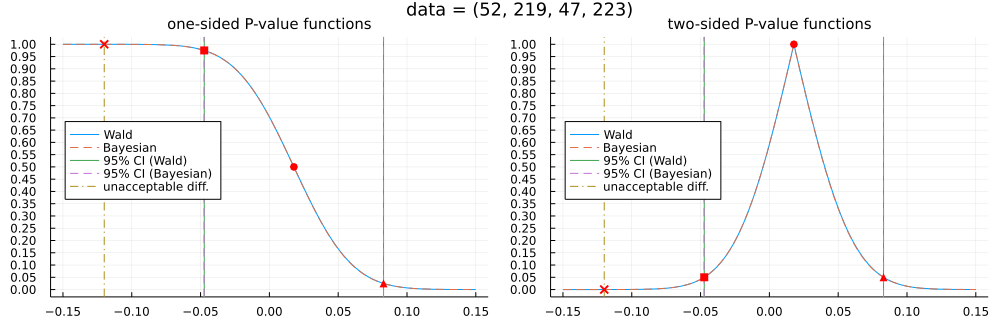

In [11]:
plot_ACCEPT(; data = secondline, unacceptable_diff = -0.12)

これの片側検定版の図(上の左半分)は[論文](https://arxiv.org/ftp/arxiv/papers/2203/2203.11164.pdf)にあった次の図の再現になっている.

<img src="https://github.com/genkuroki/public/raw/main/0034/2022-08-01b.png" width="70%">